In [1]:
import requests
import cv2
import json
%matplotlib inline
from matplotlib import pyplot as plt
import base64

In [2]:
# API Endpoint
URL = "http://localhost:3000/python/posenet"

In [3]:
img = cv2.resize(cv2.imread("Patrick.png"), (256, 256))
# img = cv2.imread("Patrick.png")

In [4]:
img.shape

(256, 256, 3)

In [5]:
encoded_img = base64.b64encode(img)

In [6]:
type(encoded_img)

bytes

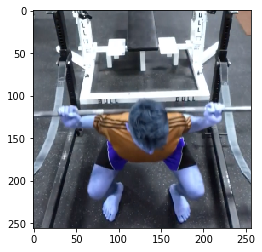

In [7]:
plt.imshow(img)

In [10]:
get_keypoints()

{'nose': (145.34718376189355, 131.75221341500486),
 'leftEye': (147.8026484033013, 128.8938520260822),
 'rightEye': (147.47997144409655, 131.01733445935676),
 'leftEar': (162.43479236647312, 135.29795748343264),
 'rightEar': (139.25791224616975, 144.57455622454097),
 'leftShoulder': (162.4275484196407, 156.62257569309338),
 'rightShoulder': (127.23687610552005, 148.94944341637282),
 'leftElbow': (174.51448813115576, 187.98276837419442),
 'rightElbow': (128.38018620709965, 169.75643695282102),
 'leftWrist': (165.74315361290127, 148.4321241564324),
 'rightWrist': (161.56622480696743, 147.41828413788912),
 'leftHip': (162.234768047407, 220.26682076658255),
 'rightHip': (125.05236222679049, 201.4318557917376),
 'leftKnee': (179.04043875965164, 213.07738972823444),
 'rightKnee': (125.31360931990211, 205.07525539769273),
 'leftAnkle': (176.8561583047711, 236.8275060987658),
 'rightAnkle': (127.64764245474849, 215.80084204766538)}

In [9]:
def get_keypoints():
    r = requests.post(url = URL, json={"image": img.tolist()})
    json_file = json.loads(r.text)
    
    body_point_map = {}
    for i in json_file[0]['keypoints']:
        part = i["part"]
        x_coord = i["position"]["x"]
        y_coord = i["position"]["y"]

        body_point_map[part] = (x_coord, y_coord)
    
    return body_point_map
        